In [79]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#Read the dataset
data = pd.read_csv(r'C:/Users/saksh/OneDrive - South Indian Education Society/major project/project/backend/hairvisedataset.csv')

In [81]:
# Display first few rows of the dataset
print(data.head())

  HairLoss            Duration     Shedding Dandruff      Type  \
0      Yes  More than 6 months   Frequently      Yes     Flaky   
1      Yes       3 to 6 months       Rarely      Yes     Flaky   
2      Yes  More than 6 months       Rarely      Yes     Flaky   
3      Yes       3 to 6 months   Frequently      Yes   Powdery   
4       No                  No           No      Yes     Flaky   

         ItchyScalp HairGreying           Treatment RegularUsage  \
0        Frequently         Yes   Keratin treatment           No   
1   Rarely or never         Yes   Keratin treatment          Yes   
2        Frequently         Yes     Colour or henna           No   
3        Frequently          No                  No           No   
4   Rarely or never          No                  No           No   

                                            Products  
0  Biotin gummies & hair growth serum, Ketoconzol...  
1  Biotin gummies, T/Gel Therapeutic Shampoo, Ker...  
2  Biotin gummies, Ketoconzol

In [82]:
# Check for missing values
print(data.isnull().sum())

HairLoss        0
Duration        0
Shedding        0
Dandruff        0
Type            0
ItchyScalp      0
HairGreying     0
Treatment       0
RegularUsage    0
Products        0
dtype: int64


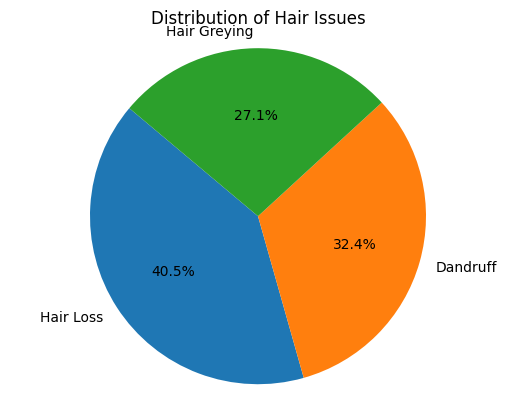

In [83]:
# Count the occurrences of each issue
hair_loss_count = data[data['HairLoss'] == 'Yes'].shape[0]
dandruff_count = data[data['Dandruff'] == 'Yes'].shape[0]
hair_greying_count = data[data['HairGreying'] == 'Yes'].shape[0]

# Create labels and sizes for the pie chart
labels = ['Hair Loss', 'Dandruff', 'Hair Greying']
sizes = [hair_loss_count, dandruff_count, hair_greying_count]

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Hair Issues')
plt.show()



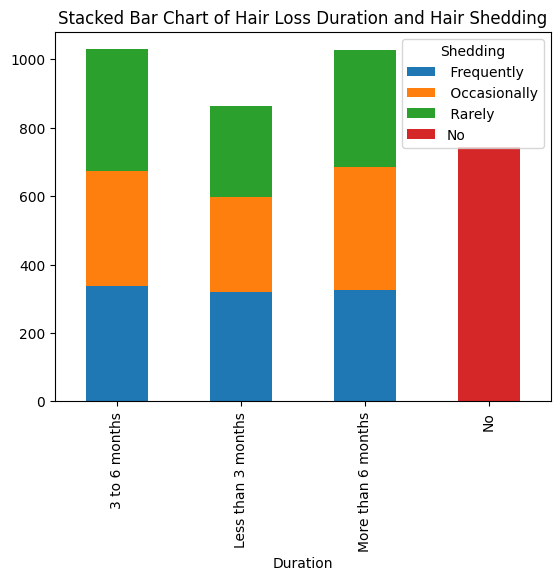

In [84]:
pd.crosstab(data['Duration'], data['Shedding']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Hair Loss Duration and Hair Shedding')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into features and target variable
X = data.drop(columns=['Products'])
y = data['Products']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [90]:
# Ask user questions
print("Please answer the following questions:")
hair_loss = input("Have you experienced hair loss? (Yes/No): ")
hair_loss_duration = input("From how long have you been noticing hair fall? (Less than 3 months/3 to 6 months/More than 6 months/No): ")
hair_shedding = input("How frequently do you notice hair fall during showering or brushing? (Rarely/Occasionally/Frequently/No): ")
dandruff = input("Do you have dandruff? (Yes/No): ")
dandruff_type = input("How do you describe your dandruff? (Powdery/Flaky/No): ")
itchy_scalp = input("Do you often notice itching on your scalp? (Rarely or never/Frequently/No): ")
hair_greying = input("Do you experience issues with hair greying? (Yes/No): ")
colour_or_treatment = input("Have you used any hair colouring products or treatments? (Colour or henna/Keratin treatment/No): ")
regular_usage = input("Do you use these hair dyes or chemical treatments regularly? (Yes/No): ")

# Convert user responses into a DataFrame
user_data = pd.DataFrame({
    'HairLoss': [hair_loss],
    'Duration': [hair_loss_duration],
    'Shedding': [hair_shedding],
    'Dandruff': [dandruff],
    'Type': [dandruff_type],
    'ItchyScalp': [itchy_scalp],
    'HairGreying': [hair_greying],
    'Treatment': [colour_or_treatment],
    'RegularUsage': [regular_usage]
})

# Convert categorical variables to numerical using one-hot encoding
user_data = pd.get_dummies(user_data)

# Make prediction using the trained model
product_suggestion = clf.predict(user_data)
print("Recommended product(s):", product_suggestion)


Please answer the following questions:


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ItchyScalp_Rarely or never
- Shedding_Rarely
- Type_Powdery
Feature names seen at fit time, yet now missing:
- Dandruff_ No
- Dandruff_No
- Duration_3 to 6 months
- Duration_More than 6 months
- Duration_No
- ...


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Products'])  # Assuming 'Products' column contains the target variable
y = data['Products']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Once your model is trained and evaluated, you can use it to make predictions on new data
# Assuming 'user_data' is a DataFrame containing user responses similar to the training data
user_data_encoded = pd.get_dummies(user_data)
user_prediction = xgb_classifier.predict(user_data_encoded)
print("Predicted product(s) for user:", user_prediction)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97], got ['Argan oil' 'Biotin gummies' 'Biotin gummies & hair growth serum'
 'Biotin gummies & hair growth serum, Argan oil'
 'Biotin gummies & hair growth serum, Keratin smooth deep mask'
 'Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo'
 'Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo, Argan oil'
 'Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo, Keratin smooth deep mask'
 'Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo, Pro-V Colour Shampoo'
 'Biotin gummies & hair growth serum, Ketoconzole anti dandruff shampoo, Pure black sesame oil'
 'Biotin gummies & hair growth serum, Nizoral A-D Anti Dandruff Shampoo'
 'Biotin gummies & hair growth serum, Nizoral A-D Anti Dandruff Shampoo, Argan oil'
 'Biotin gummies & hair growth serum, Nizoral A-D Anti Dandruff Shampoo, Keratin smooth deep mask'
 'Biotin gummies & hair growth serum, Nizoral A-D Anti Dandruff Shampoo, Pro-V Colour Shampoo'
 'Biotin gummies & hair growth serum, Nizoral A-D Anti Dandruff Shampoo, Pure black sesame oil'
 'Biotin gummies & hair growth serum, Pro-V Colour Shampoo'
 'Biotin gummies & hair growth serum, Pure black sesame oil'
 'Biotin gummies & hair growth serum, T/Gel Therapeutic Shampoo'
 'Biotin gummies & hair growth serum, T/Gel Therapeutic Shampoo, Argan oil'
 'Biotin gummies & hair growth serum, T/Gel Therapeutic Shampoo, Keratin smooth deep mask'
 'Biotin gummies & hair growth serum, T/Gel Therapeutic Shampoo, Pro-V Colour Shampoo'
 'Biotin gummies & hair growth serum, T/Gel Therapeutic Shampoo, Pure black sesame oil'
 'Biotin gummies & hair growth serum, Tea tree oil & shampoo'
 'Biotin gummies & hair growth serum, Tea tree oil & shampoo, Argan oil'
 'Biotin gummies & hair growth serum, Tea tree oil & shampoo, Keratin smooth deep mask'
 'Biotin gummies & hair growth serum, Tea tree oil & shampoo, Pro-V Colour Shampoo'
 'Biotin gummies & hair growth serum, Tea tree oil & shampoo, Pure black sesame oil'
 'Biotin gummies, Argan oil' 'Biotin gummies, Keratin smooth deep mask'
 'Biotin gummies, Ketoconzole anti dandruff shampoo'
 'Biotin gummies, Ketoconzole anti dandruff shampoo, Argan oil'
 'Biotin gummies, Ketoconzole anti dandruff shampoo, Keratin smooth deep mask'
 'Biotin gummies, Ketoconzole anti dandruff shampoo, Pro-V Colour Shampoo'
 'Biotin gummies, Ketoconzole anti dandruff shampoo, Pure black sesame oil'
 'Biotin gummies, Nizoral A-D Anti Dandruff Shampoo'
 'Biotin gummies, Nizoral A-D Anti Dandruff Shampoo, Argan oil'
 'Biotin gummies, Nizoral A-D Anti Dandruff Shampoo, Keratin smooth deep mask'
 'Biotin gummies, Nizoral A-D Anti Dandruff Shampoo, Pro-V Colour Shampoo'
 'Biotin gummies, Nizoral A-D Anti Dandruff Shampoo, Pure black sesame oil'
 'Biotin gummies, Pro-V Colour Shampoo'
 'Biotin gummies, Pure black sesame oil'
 'Biotin gummies, T/Gel Therapeutic Shampoo'
 'Biotin gummies, T/Gel Therapeutic Shampoo, Argan oil'
 'Biotin gummies, T/Gel Therapeutic Shampoo, Keratin smooth deep mask'
 'Biotin gummies, T/Gel Therapeutic Shampoo, Pro-V Colour Shampoo'
 'Biotin gummies, T/Gel Therapeutic Shampoo, Pure black sesame oil'
 'Biotin gummies, Tea tree oil & shampoo'
 'Biotin gummies, Tea tree oil & shampoo, Argan oil'
 'Biotin gummies, Tea tree oil & shampoo, Keratin smooth deep mask'
 'Biotin gummies, Tea tree oil & shampoo, Pro-V Colour Shampoo'
 'Biotin gummies, Tea tree oil & shampoo, Pure black sesame oil'
 'Keratin smooth deep mask' 'Ketoconzole anti dandruff shampoo'
 'Ketoconzole anti dandruff shampoo, Argan oil'
 'Ketoconzole anti dandruff shampoo, Keratin smooth deep mask'
 'Ketoconzole anti dandruff shampoo, Pro-V Colour Shampoo'
 'Ketoconzole anti dandruff shampoo, Pure black sesame oil'
 'Nizoral A-D Anti Dandruff Shampoo' 'Nizoral A-D Anti Dandruff Shampoo, '
 'Nizoral A-D Anti Dandruff Shampoo, Keratin smooth deep mask'
 'Nizoral A-D Anti Dandruff Shampoo, Pro-V Colour Shampoo'
 'Nizoral A-D Anti Dandruff Shampoo, Pure black sesame oil'
 'Pro-V Colour Shampoo' 'Pure black sesame oil' 'Rosemarry oil & shampoo'
 'Rosemarry oil & shampoo, '
 'Rosemarry oil & shampoo,  Ketoconzole anti dandruff shampoo, Argan oil'
 'Rosemarry oil & shampoo,  Ketoconzole anti dandruff shampoo, Keratin smooth deep mask'
 'Rosemarry oil & shampoo,  Ketoconzole anti dandruff shampoo, Pure black sesame oil'
 'Rosemarry oil & shampoo,  T/Gel Therapeutic Shampoo, Keratin smooth deep mask'
 'Rosemarry oil & shampoo,  T/Gel Therapeutic Shampoo, Pure black sesame oil'
 'Rosemarry oil & shampoo,  T/Gel Therapeutic Shampooo, Argan oil'
 'Rosemarry oil & shampoo, Argan oil'
 'Rosemarry oil & shampoo, Keratin smooth deep mask'
 'Rosemarry oil & shampoo, Ketoconzole anti dandruff shampoo'
 'Rosemarry oil & shampoo, Ketoconzole anti dandruff shampoo, Pro-V Colour Shampoo'
 'Rosemarry oil & shampoo, Nizoral A-D Anti Dandruff Shampoo'
 'Rosemarry oil & shampoo, Pro-V Colour Shampoo'
 'Rosemarry oil & shampoo, Pure black sesame oil'
 'Rosemarry oil & shampoo, T/Gel Therapeutic Shampoo'
 'Rosemarry oil & shampoo, T/Gel Therapeutic Shampoo, Pro-V Colour Shampoo'
 'Rosemarry oil & shampoo, Tea tree oil & shampoo'
 'Rosemary oil & shampoo, Nizoral A-D Anti Dandruff Shampoo, Argan oil'
 'Rosemary oil & shampoo, Nizoral A-D Anti Dandruff Shampoo, Keratin smooth deep mask'
 'Rosemary oil & shampoo, Nizoral A-D Anti Dandruff Shampoo, Pro-V Colour Shampoo  '
 'Rosemary oil & shampoo, Nizoral A-D Anti Dandruff Shampoo, Pure black sesame oil  '
 'Rosemary oil & shampoo, Tea tree oil shampoo, Argan oil'
 'Rosemary oil & shampoo, Tea tree oil shampoo, Keratin smooth deep mask'
 'Rosemary oil & shampoo, Tea tree oil shampoo, Pro-V Colour Shampoo  '
 'Rosemary oil & shampoo, Tea tree oil shampoo, Pure black sesame oil '
 'T/Gel Therapeutic Shampoo' 'T/Gel Therapeutic Shampoo, Argan oil'
 'T/Gel Therapeutic Shampoo, Keratin smooth deep mask'
 'T/Gel Therapeutic Shampoo, Pro-V Colour Shampoo'
 'T/Gel Therapeutic Shampoo, Pure black sesame oil'
 'Tea tree oil & shampoo' 'Tea tree oil & shampoo, '
 'Tea tree oil & shampoo, Pro-V Colour Shampoo']